# Auxiliary notebook 1: create DTM overlay

The purpose of this notebook is to generate an overlay to show the resoultion of the digital terrain model (DTM) in GoogleEarth. This aspect is important to avoid picking points too close to each other, for example when picking points for plane fits.

In [2]:
import sys, warnings, numpy as np, matplotlib.pyplot as plt, gdal
sys.path.append(r"..")
import rgeomod
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
geotiff_filepath = "../data/dome_sub_sub_utm.tif"
ds = gdal.Open(geotiff_filepath)
band = ds.GetRasterBand(1)
arr = band.ReadAsArray()
[cols, rows] = arr.shape

## Create visualization with grid for resolution


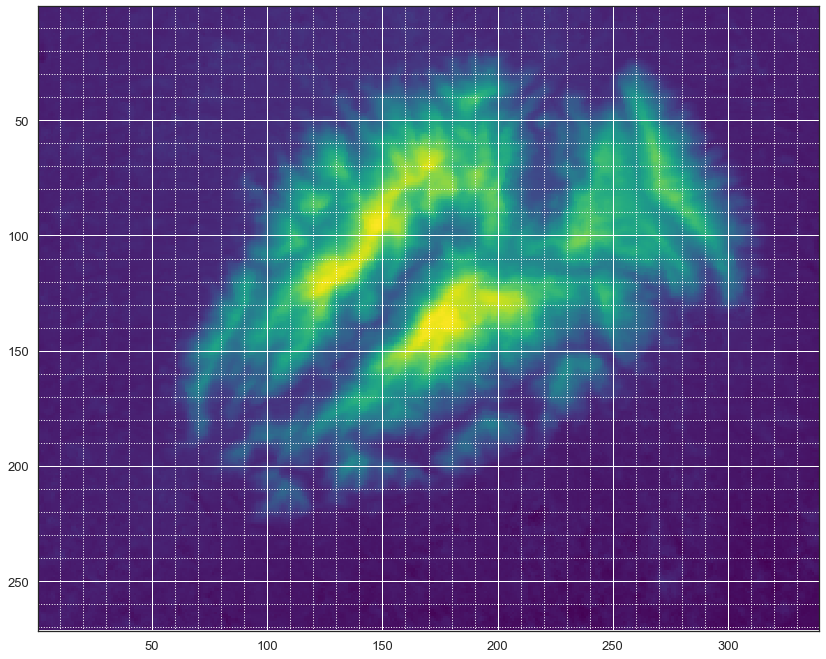

In [49]:
plt.figure(figsize=(14,12))
plt.imshow(arr, #[10:-10,10:-10], # origin='lower left', 
           cmap='viridis', 
           interpolation='nearest')


# plt.contour(arr_sub, 20, lw=0.5, # origin='lower left', 
#             cmap='gray')

ax = plt.gca();
# ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(-0.5, 350, 50));
ax.set_yticks(np.arange(-0.5, 300, 50));

# Labels for major ticks
ax.set_xticklabels(np.arange(0, 350, 50));
ax.set_yticklabels(np.arange(0, 300, 50));

# Minor ticks
ax.set_xticks(np.arange(-.5, 350, 10), minor=True);
ax.set_yticks(np.arange(-.5, 300, 10), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle=':', linewidth=1)
ax.grid(which='major', color='w', linestyle='-', linewidth=1)

# adjust scale
ax.set_xlim((0,rows))
ax.set_ylim((cols, 0))

# save as png
# plt.rcParams['font.size'] =  20.0
plt.savefig("../data/dtm_grid.png", bbox_inches='tight', dpi=300)

## Placing image in GoogleEarth

The generated image can now be "placed" in GoogleEarth. Note the difference to the GeoTiff generated from the geological map: we now do not have geographic information in the image and have to place it by hand.

For this step, locate approximately the same viewpoint in GoogleEarth. Then use the `Add -> Image Overlay` tool to place the image. Adjust the range to obtain a good placement (note: the DTM-shading can help when you make the image slightly transparent and compare locations of valleys, etc.).

